# Logistic regression
##### 2333084 梁潇怡

## Dataset
本次作业中，我使用了来自UCI Machine Learning Repository的IRIS数据集，根据来自官方的介绍，数据集包括了包括了4个属性、3种标签。
Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
该数据集共包含150条数据，每个标签对应50条数据。
由于包括了3种标签，因此在此次作业中，手动去除一种标签，使其符合二分类的数据集。

In [4]:
## Load Dataset

import pandas as pd
import numpy as np


seed = 42
np.random.seed(seed)

data = pd.read_csv('./iris/iris.data',sep=',')
data.columns=['sepal_length','sepal_width','petal_length','petal_width',"label"]
data.label = pd.factorize(data['label'])[0]
data = data[data.label != 2]


## Logist Regression Model


在此次作业中，我完成了逻辑回归模型的两种方法，分别是使用极大似然估计与使用牛顿法完成逻辑回归。

### 极大似然估计



In [5]:
class LogistRegression:
    def __init__(self, lr, max_iter, threshold):
        self.lr = lr
        self.max_itr = max_iter
        self.threshold =threshold
        
    def _sigmoid(self, z):
        return 1. / (1. + np.exp(-z))
    
    # def J(self, theta, x_w, y_train):
    #     y_hat = self._sigmoid(x_w @ theta)
    #     return -(y_train*np.log(y_hat) + (1-y_train)*np.log(1-y_hat))
        
    def dJ(self, theta, x_w, y_train):
        y_hat = self._sigmoid(x_w @ theta)
        return(y_hat - y_train) @ x_w
    
    def hessian(self, x_w, y_train):
        y_hat = self._sigmoid(x_w @ self._theta)
        return x_w.T * y_hat * (1-y_hat) @ x_w
    
    def fit_newtown(self,x_train,y_train):
        x_w = np.hstack([np.ones((len(x_train), 1)), x_train])
        self._theta = np.zeros(x_w.shape[1])
        for _ in range(self.max_itr):
            pre_theta = self._theta
            grad = self.dJ(self._theta,x_w,y_train)
            hessian = self.hessian(x_w,y_train)
            try:
                self._theta -= np.linalg.solve(hessian, grad) * self.lr
            except np.linalg.LinAlgError:
                break
            if np.allclose(self._theta, pre_theta):
                break
    
    def fit(self,x_train,y_train):
        x_w = np.hstack([np.ones((len(x_train), 1)), x_train])
        self._theta = np.zeros(x_w.shape[1])
        for _ in range(self.max_itr):
            pre_theta = self._theta
            grad = self.dJ(self._theta,x_w,y_train)
            self._theta = self._theta - self.lr * grad
            if np.allclose(self._theta, pre_theta):
                break

            
    def predict(self,x_test):
        x_w = np.hstack([np.ones((len(x_test), 1)), x_test])
        y_pred = self._sigmoid(x_w.dot(self._theta))
        y_pred = np.array(y_pred >= self.threshold , dtype = 'int')
        return y_pred


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.to_numpy()[:,:4], data.to_numpy()[:,-1], test_size=0.4)

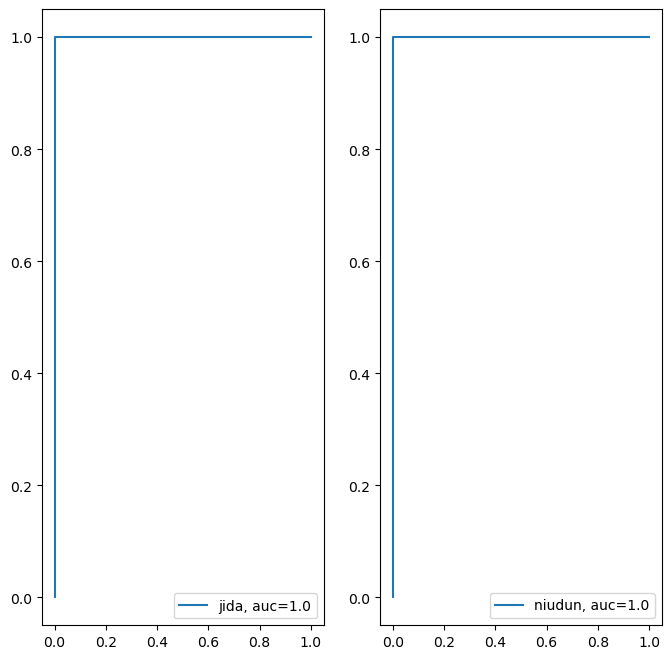

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
model = LogistRegression(lr=0.01, max_iter=1000, threshold=0.5)
plt.figure(figsize=(16, 4))


model.fit_newtown(X_train, y_train)
y_pred = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.subplot(1, 2, 1)
plt.plot(fpr,tpr,label="jida, auc="+str(auc))
plt.legend(loc=4)
# plt.show()

# plt.figure(figsize=(4, 8))

model.fit_newtown(X_train, y_train)
y_pred = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.subplot(1,2, 2)
plt.plot(fpr,tpr,label="niudun, auc="+str(auc))
plt.legend(loc=4)
plt.show()


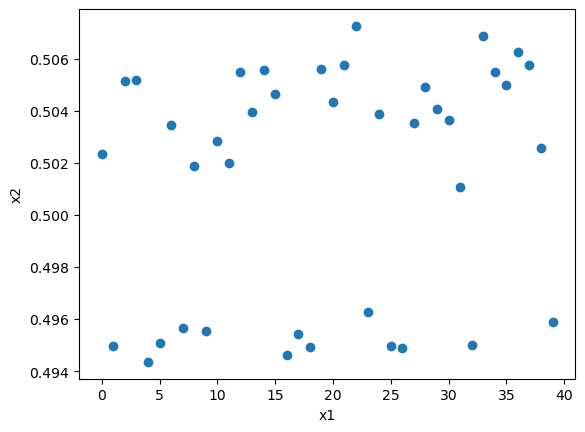

In [25]:

plt.scatter(x=range(len(y_pred)),y=y_pred)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
